# Diplomatura en Ciencia de Datos, Aprendizaje Automático y sus Aplicaciones
# Materia: Introducción al Aprendizaje Automático
**Trabajo Práctico Entregable 2**


**Armado de un esquema de aprendizaje automático**


**Grupo 22. Integrantes:**
* Carazo, Fernando Diego
* Cardellino, Fernando.
* Ferrero, Nicolás.
* Molina, Florencia
* Pizarro, Rodrigo. 


**Consigna**


En el laboratorio final se espera que puedan poner en práctica los conocimientos adquiridos en el curso, trabajando con un conjunto de datos de clasificación.

El objetivo es que se introduzcan en el desarrollo de un esquema para hacer tareas de aprendizaje automático: selección de un modelo, ajuste de hiperparámetros y evaluación.

El conjunto de datos a utilizar está en `./data/loan_data.csv`. Si abren el archivo verán que al principio (las líneas que empiezan con `#`) describen el conjunto de datos y sus atributos (incluyendo el atributo de etiqueta o clase).

Se espera que hagan uso de las herramientas vistas en el curso. Se espera que hagan uso especialmente de las herramientas brindadas por `scikit-learn`.

In [14]:
# I-  ===========================  importacion de modulos/librerias-.
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess as sp
import seaborn as sns
from matplotlib import gridspec
import scipy.stats as st
import itertools

# @ AA
from sklearn.linear_model import SGDClassifier # excercise 2-.
from sklearn.model_selection import train_test_split, ParameterGrid
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay 
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree # to plot treeDecision-.
from sklearn.preprocessing import MinMaxScaler, StandardScaler

## Carga de datos y división en entrenamiento y evaluación


La celda siguiente se encarga de la carga de datos (haciendo uso de pandas). Estos serán los que se trabajarán en el resto del laboratorio.

In [16]:
df = pd.read_csv("/home/fcarazo/diploDatos2022/IaAA/tempToWork/loan_data.csv", comment="#")

Antes de comenzar a desarrollar los puntos chequeamos la carga del conjunto de datos (DS) con algunos comandos básicos. Visualizamos 5 atributos/características seleccionados aleatoriamente junto a otros datos fundamentales-.

In [17]:
print(df.sample(5))
# imprimo algunas caracteristicas minimas requeridas para responder
# el punto 1-.
print(df.shape)
print(df.TARGET.unique())
print(df['TARGET'].value_counts(ascending=True))
# idem % pero mas simple-.
print(round(df['TARGET'].value_counts(normalize=True),2)) 
print(df.TARGET.eq(0).sum())
print(round(df.TARGET.eq(1).sum()*100/df.shape[0],2))
print(round(df.TARGET.eq(0).sum()*100/df.shape[0],2))

print('{0}{1} ******** Descripcion del df ******** {2}'.
      format('\n', '\t', '\n'))  # descripcion del df-.

      TARGET   LOAN   MORTDUE     VALUE   YOJ  DEROG  DELINQ       CLAGE  \
1641       1  12000   48189.0   53969.0   5.0    0.0     0.0  276.381743   
15         0   9000   56930.0   67557.0   0.0    0.0     1.0  118.699516   
152        0  19600   85984.0  112721.0  18.0    0.0     0.0  239.137794   
846        0  17000  125257.0  161009.0   3.0    0.0     0.0  129.757800   
176        0  24700  109377.0  133116.0  10.0    1.0     0.0  184.355783   

      NINQ  CLNO    DEBTINC  
1641   0.0  18.0  65.495243  
15     2.0  18.0  36.686882  
152    4.0  31.0  36.031180  
846    1.0  21.0  27.637207  
176    5.0  17.0  40.202630  
(1854, 11)
[0 1]
1     309
0    1545
Name: TARGET, dtype: int64
0    0.83
1    0.17
Name: TARGET, dtype: float64
1545
16.67
83.33

	 ******** Descripcion del df ******** 




Documentación:

- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

## Ejercicio 1: Descripción de los Datos y la Tarea

Responder las siguientes preguntas:

1. ¿De qué se trata el conjunto de datos?
2. ¿Cuál es la variable objetivo que hay que predecir? ¿Qué significado tiene?
3. ¿Qué información (atributos) hay disponible para hacer la predicción?
4. ¿Qué atributos imagina ud. que son los más determinantes para la predicción?

**No hace falta escribir código para responder estas preguntas.**

1. El DS contiene informacion de 1854 préstamos hipotecarios (sobre el valor acumulado de la vivienda, através del tiempo). Tiene una variable objetivo  y diez atributos/características. El total de registros es 1854, del total, 309 (16.67%) incumplieron en el pago del préstamo y 1545 (83.33%) cumplieron.

2. Variable OBJETIVO (target): variable binaria que indica si el/la  solicitante incumplió (== moroso) o cumplió con el pago del  préstamo. Como se dijo, es una variable de estado (binaria, categórica  nominal) que puede tomar dos valores:
* 1: cliente incumplió con el pago del préstamo-.
* 0: cliente cumplió con el pago del préstamo-.

3. Como se dijo el DS cuenta con diez atributos, cuyos significados son:
* LOAN (PRÉSTAMO): importe de la solicitud del préstamo (¿será lo mismo que el monto prestado?)-.
* MORTDUE: monto adeudado sobre la hipoteca-.
* VALUE (VALOR): valor actual de la propiedad-.
* YOJ: antiguedad (en años) en el trabajo actual-.
* DEROG: cantidad de informes negativos importantes (no se a qué se refiere, i.e. que será en el país del DS "informes negativos importantes")-.
* DELINQ: cantidad de créditos en los que se lo/a declaró como moroso/a-.
* CLAGE: antiguedad (en meses) del crédito más antiguo-.
* NINQ: cantidad de créditos recientes-.
* CLNO:  cantidad total de créditos con que cuenta-.
* DEBTINC: relación deuda-ingresos-.

4. 
* DEROG-.
* DELINQ-. 
* DEBTINC-.
* CLNO-.

## Ejercicio 2: Predicción con Modelos Lineales

En este ejercicio se entrenarán modelos lineales de clasificación para predecir la variable objetivo.

Para ello, deberán utilizar la clase SGDClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/sgd.html
- https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.SGDClassifier.html


### Ejercicio 2.1: SGDClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador SGDClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Creamos los conjuntos de datos para entrenamiento y testeo.

In [72]:
# DSs to create a model-.
df_atrib= df.drop(['TARGET'], axis=1); df_target= df.TARGET
print(df_atrib.columns) # @ chequear que no este la variable objetivo-.
# atrib= atrib.reshape(-1,1)

# split the DS in trainng and test 
X_train, X_test, y_train, y_test = train_test_split(df_atrib,
                                                    df_target,
                                                    test_size=0.2,
                                                    random_state=0
                                                    )

# veo el tamaño de los conjuntos de entrenamiento y validacion-.
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
print(df_target.value_counts()[0]/df_target.value_counts()[1])

Index(['LOAN', 'MORTDUE', 'VALUE', 'YOJ', 'DEROG', 'DELINQ', 'CLAGE', 'NINQ',
       'CLNO', 'DEBTINC'],
      dtype='object')
(1483, 10) (1483,)
(371, 10) (371,)
5.0


Al observar los tamaños de los conjuntos de datos de entrenamiento y testeo, se observa que están debalanceados (tal como el conjunto de datos de partida en la variable objetivo).

* NOTA: (from official documentation): El método del descenso de gradiente estocástico (SGD) es sensible al escalado de las variables/características, por lo que se recomienda ESCALAR los DATOS antes de aplicar este algoritmo, i.e.:
1. escalar cada valor del vector de entrada X a [0,1] o [-1, + 1],
2. o ESTANDARIZARLO para que tenga una media 0 y una varianza 1.

Tener en cuenta que se debe aplicar la misma escala al vector de prueba (TARGET) para obtener resultados representativos.

In [73]:
# 1- firsth option (StandardScaler get np.array)
scaler= StandardScaler() # instancia del modelo-.
scaler.fit(X_train) # entrenamos el modelo-.
# escalamos los conjuntos de entrenamiento y test-.
X_train_scaled= scaler.transform(X_train) # -- X_train_scaled= scaler.fit_transform(X_train)
X_test_scaled= scaler.transform(X_test) # -- X_test_scaled= scaler.fit_transform(X_test)

# print(np.unique(X_train[:,1]))
# print(X_train.shape, y_train.shape)
# print(X_test.shape, y_test.shape)
# print(y_train.unique())
# print(y_test.unique())
# print(y_train.value_counts())
# print(y_test.value_counts())

In [74]:
# quizás es más facil escalando y estandarizando antes el PDF df_atrib
# scaler.fit(df_atrib)
# df_atrib_scaled= scaler.transform(df_atrib)
# -- dos lineas anteriores iguales a
# df_atrib_scaled= scaler.fit_transform(df_atrib)

Chequeamos el balancea de las etiquetas de la variable clasficación en los conjuntos de entrenamiento y test.

In [75]:
print('Balanceo etiqueteas conjuno de ENTRENAMIENTO = 0/1 = {0}'.
      format(round(y_train.value_counts()[0]/y_train.value_counts()[1],2)))
print('Balanceo etiqueteas conjuno de TEST = 0/1 = {0}'.
      format(round(y_test.value_counts()[0]/y_test.value_counts()[1],2)))

Balanceo etiqueteas conjuno de ENTRENAMIENTO = 0/1 = 4.91
Balanceo etiqueteas conjuno de TEST = 0/1 = 5.4


Vemos que se mantienen prácticamente constantes e igual a 5 como en la variable target de partida.

Chequeamos cuáles son los parámetros y los valores correspondientes del clasificdor.

In [76]:
print(SGDClassifier().get_params())

{'alpha': 0.0001, 'average': False, 'class_weight': None, 'early_stopping': False, 'epsilon': 0.1, 'eta0': 0.0, 'fit_intercept': True, 'l1_ratio': 0.15, 'learning_rate': 'optimal', 'loss': 'hinge', 'max_iter': 1000, 'n_iter_no_change': 5, 'n_jobs': None, 'penalty': 'l2', 'power_t': 0.5, 'random_state': None, 'shuffle': True, 'tol': 0.001, 'validation_fraction': 0.1, 'verbose': 0, 'warm_start': False}


In [77]:
# it's not necessary, if we use the line 10 the object is created with default class attributes-.
SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False
              )

# instance the class (class Object)
sgd_obj= SGDClassifier(random_state=0)

# training the model on entire training data-.
sgd_obj.fit(X_train_scaled, y_train)

# predict (using training and test DSs)-.
y_train_predic= sgd_obj.predict(X_train_scaled)
y_test_predic= sgd_obj.predict(X_test_scaled)

# check dataTypes of predicted values-.
# print('Data type of y_train_predic: {0}'.format(type(y_train_predic)))
# print('Data type of y_train_predic: {0}'.format(type(y_test_predic)))

In [78]:
# newline
nl = '\n'  # used in f's print formats-.

In [79]:
def new_print(str_to_print: str,
              start_print=True,
              end_print=False):
    if start_print:
        enc = '< ========//=========== > INI NUEVO PRINT' + \
            '< ==========//========== > '
        print('{0}{1}{2}{3}{4}{5}{6}'.
              format('\t', '\n', enc, '\n',
                     '\t', str_to_print, '\n'))
    elif end_print:
        enc = '< ========//=========== > END NUEVO PRINT' + \
            '< ==========//========== > '
        print('{0}'.format(enc))

    return

In [80]:
def report_sgd_class(y_true, y_pred, string: str):
    print('******************************************************************')
    print("SGD - Reporte de clasificacion del conjunto de {0}".
          format(string))
    print('******************************************************************'.
          format(nl))
    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.classification_report.html
    # idem that
    # 1- accuracy: (tp+tn)/(p+n)
    # accuracy = accuracy_score(y_true, y_pred)
    # 2- precision tp/(tp+fp)
    # precision = precision_score(y_true, y_pred)
    # 3- recall: tp/(tp+fn)
    # recall = recall_score(y_true, y_pred)
    # 4- f1: 2*tp/(2*tp+fp+fn)
    # f1 = f1_score(y_true, y_pred)
    print(classification_report(y_true, y_pred))
    return

new_print('Evaluacion sobre el CdEnt y sobre el CdEva (SGDClassifier)', True)
# train (entrenamiento)-.
report_sgd_class(y_train, y_train_predic, 'ENTRENAMIENTO')
# test (evaluacion)-.
report_sgd_class(y_test, y_test_predic, 'EVALUACION')
new_print(None, False, True)

	
< ========//=========== > INI NUEVO PRINT< ==========//========== > 
	Evaluacion sobre el CdEnt y sobre el CdEva (SGDClassifier)

******************************************************************
SGD - Reporte de clasificacion del conjunto de ENTRENAMIENTO
******************************************************************
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.71      0.42      0.53       251

    accuracy                           0.87      1483
   macro avg       0.80      0.69      0.73      1483
weighted avg       0.86      0.87      0.86      1483

******************************************************************
SGD - Reporte de clasificacion del conjunto de EVALUACION
******************************************************************
              precision    recall  f1-score   support

           0       0.89      0.96      0.92       313
           1       0.65      0.34      0.45  

[[1190   42]
 [ 146  105]]
[[302  11]
 [ 38  20]]
[[0.97 0.03]
 [0.58 0.42]]
[[0.96 0.04]
 [0.66 0.34]]


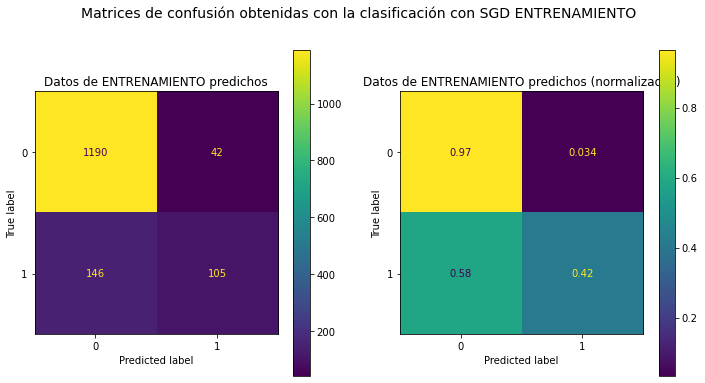

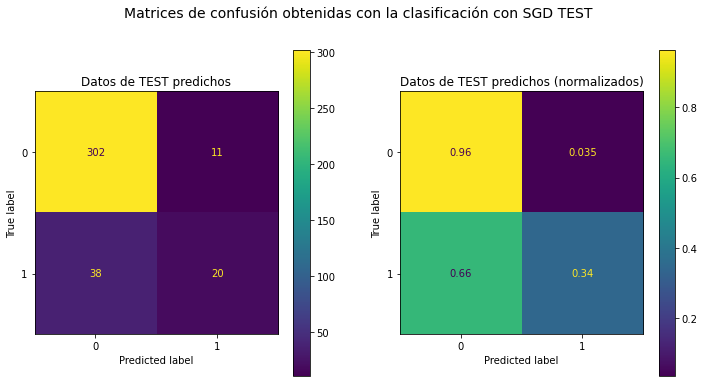

In [81]:
# metrics
# https://scikit-learn.org/stable/modules/model_evaluation.html#confusion-matrix
def get_cm(train_data, train_data_pred, objlab:np.array=None):
    # calculate confusion matrx (with and without normalzation)-.
    cm = confusion_matrix(train_data,
                          train_data_pred,
                          labels=objlab)
    cm_n = confusion_matrix(train_data,
                            train_data_pred,
                            normalize= 'true',
                            labels=objlab)
    return cm, cm_n

# ** matriz de confusion de los datos de entrenamiento SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de entrenamiento-.
cm, cm_n= get_cm(y_train, y_train_predic, sgd_obj.classes_) # unpacking-.
cm_test, cm_n_test= get_cm(y_test, y_test_predic, sgd_obj.classes_) # unpacking-.

# imprimo las matrices de confusion SIN NORMALIZAR y NORMALIZADA (conj. de entrenamiento y test)-.
print(cm)
print(cm_test)
with np.printoptions(precision=2, suppress=True): # apply print options locally
    print(cm_n)
    print(cm_n_test)

# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.ConfusionMatrixDisplay.html
# https://stackoverflow.com/questions/61825227/plotting-multiple-confusion-matrix-side-by-side
def plot_cm(cm_l:np.array, cm_n_l:np.array, nr:int, nc:int, set_title:str=None,
            data_source:str=None):
    # in order to work with ==> nrows= 1; ncols= 2 (stackoverflow) 
    # squeeze=False ==> to have it always return a 2D array. 
    figure1, axes= plt.subplots(nr, nc, figsize=(12,6),
                                squeeze=False)
    cmd= ConfusionMatrixDisplay(confusion_matrix=cm_l,
                                display_labels=sgd_obj.classes_
                                )
    cmd.plot(ax=axes[0][0])
    cmd= ConfusionMatrixDisplay(confusion_matrix=cm_n_l,
                                display_labels=sgd_obj.classes_
                                )
    cmd.plot(ax=axes[0][1])
    # figure1.label('Datos de ENTRENAMIENTO predichos')
    label_str= 'Datos de {0} predichos'.format(data_source)
    axes[0,0].set_title(label_str)
    axes[0,1].set_title(label_str + ' (normalizados)')
    figure1.suptitle(set_title, fontsize=14)
    plt.show()
    return
    
if True:
    nrows= 1; ncols= 2
    plot_cm(cm, cm_n, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con SGD ENTRENAMIENTO', 'ENTRENAMIENTO'
            )
if True:
    nrows= 1; ncols= 2
    plot_cm(cm_test, cm_n_test, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con SGD TEST', 'TEST'
            )

# Presentación y análisis de los resultados encontrados
1. Métricas:
* precision: se observa que el modelo puede identificar un cliente con capacidad de pagar un crédito (0) un 89% de veces (solo un 11% de veces el clasificador identificó a un cliente cumplidor siendo incumplidor); en tanto como incumplidor del compromiso (1) solo un 65% de veces (esto implica que un 35% de veces identificó a un cliente como incumplidor siendo cumplidor de la obligación contraída -reembolso del crédito-).
* recall: lo mencionado en el punto anterior se pone de manifiesto al analizar esta métrica del clasificador. En el caso de la etiqueta 0, en un 96% de los casos el clasificador identificó a un cliente correctamente y en el caso de la etiqueta 1 en un 34%. Esto demuestra la bondad del modelo para clasificar adecuadamente a los clientes con capacidad de reembolsar el cŕedito (0) y no como 1 o incumplidores de los compromisos de pago adquiridos.
* f1-score: para el clasificador 0 (cliente con capacidad de reembolsar un crédito), existe un balanceo entre precision y recall (valor alto ~ 0.92); en tanto para el clasificador 1 (clientes no capaces de reembolsar un crédito) es bajo (~ 0.45). Esto demuestra el desbalanceo entre las métricas precision y recall siendo más relevante precision que recall.
* Lo expuesto se pone de manifiesto al analizar el accuracy del conjunto de datos test. El accuracy es alto para el conjunto de datos test, 0.87. Sin embargo y debido al desabalanceo en la variable target (las etiquetas 0 y 1), esta no es una buena métrica para indicar la bondad de ajuste del modelo (como se demostró al analizar precision, recall y f1-score).


Claramente y debido al desbalanceo que presenta el conjuntos de datos de partida en la variable/característica objetivo o target, este modelo tiene una alta bondad para predecir bien la capacidad de pago de un cliente (etiqueta 0) pero muy mala para predecir la etiqueta 1 o a un cliente como incumplidor de los compromisos de pago de un crédito. 

2. Matriz de confusion


Los valores de las métricas correspondientes a las predicciones del conjunto test se reflejan en la matriz de confusión, esto es:
* TP (true positive): 302 potenciales clientes a los que se les otorgaría el crédito podrían pagarlo.
* FP (false positive): a 38 potenciales clientes que se les otorgó el crédito son clasificados con capacidad de reembolsar el empréstito y en realidad no lo son.
* FN (false negative): a 11 potenciales clientes que se les otorgaría el crédito son clasificados sin capacidad de reembolsar el empréstito y en realidad pueden pagarlo.
* TN (true negative): 20 potenciales clientes a los que se les otorgaría el crédito no podrían pagarlo y son potenciales incumplidores de las obligaciones adquiridas.


Una buena clasificación se refleja en la matriz de confusión si los valores más altos están en la diagonal principal. Claramente y como se desprende al observar la matriz de confusión obtenida para el conjunto de test, en las predicciones de nuestro modelo esto no ocurre.


Como conlusión y corolario final puede decirse que las métricas reportadas son:
* un buen indicador para determinar si un potencial cliente es capaz de reembolsar un crédito.
* un mal indicador para determinar si un potencial cliente no es capaz de reembolsar un crédito.
* tal como se desprende del análisis, la métrica f1-score es la menos mala para el problema de clasificación objeto de estudio (y en general para cualquier problema de clasificación con conjuntos de datos debalanceados). 

### Ejercicio 2.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del SGDClassifier. Como mínimo, probar diferentes funciones de loss, tasas de entrenamiento y tasas de regularización.

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

Definimos un diccionario con los valores de los hiperparámetros

In [82]:
# 1- definimos los hiperparametros. Para esto declaramos e inicializamos un
# diccionario con una serie de valores para los parametros indicados en la consigna
# y para otros tres un único valor (idem que los de defecto, solo para probar/practicar)-.
grid = {'loss': ['hinge', 'log', 'epsilon_insensitive'], # linar SVM, log_loss: logRegression-.
        'penalty': ['l2', 'l1', 'elasticnet'],
        'alpha': [1.0e-5, 1.0e-4, 1.0e-3], # regularization and TasaDeAprend == learning rate-.
        'max_iter': [1e+6], # number of epochs-.
        'power_t': [5.0e-1],
        'learning_rate' : ['optimal'], # learning rate
        'n_jobs': [-1]
        }

paramGrid = ParameterGrid(grid)

Entrenamos, ajustamos y predecimos el modelo SGD con los valores de los hiperparámetros definidos en la celda anterior.

NOTA: la clase GridSearchCV permite evaluar y seleccionar de forma sistemática los parámetros de un modelo   evaluando el rendimiento del modelo en función de los parámetros mediante validación cruzada. Parte de sus argumentos son el modelo -SGD-, un diccionario con los hiperparámetros que queremos probar, scoring (método para evaluar el rendimiento del modelo de validación cruzada en el conjunto de pruebas) y cv (estrategia de división de validación cruzada, por defecto usa 5).

In [83]:
# 2° manera: usando GridSearchCV-.
# instance the class (class Object)-.
sgd_obj_cv= SGDClassifier(random_state=0) # idem previous case-.

# from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
fold_sgd= None  # 5-fold cross-validation -- by Default it use 5-fold cross validation-.
# Exhaustive search over specified parameter values for an estimator.
sgd_cv= GridSearchCV(sgd_obj_cv, 
                     grid,
                     scoring='accuracy',
                     cv=fold_sgd,
                     # n_jobs=[-1] # it doesn't work, why? (all CPUs)-.
                     )
# training the model on entire training data-.
sgd_cv.fit(X_train_scaled, y_train);

# see atributes of object-.
print(sorted(sgd_cv.cv_results_.keys()))
# see results-.
# print(sgd_cv.cv_results_)
print('{0}Parametros del mejor modelo{1}'.format(nl, nl))
print(sgd_cv.get_params())
print(sgd_cv.best_params_)

# as I saw it's complicated visualizate the results, convert it to PDF (pandasDF)-.
# from https://stackoverflow.com/questions/58835592/result-of-gridsearchcv-as-table
df_results_cv= pd.DataFrame(sgd_cv.cv_results_)
# print(pd.DataFrame({'param': sgd_cv.cv_results_["params"],
#                     'acc': sgd_cv.cv_results_["mean_test_score"]}
#                    )
#       )

print(df_results_cv.head(5))

# using best model to predict (TRAINING and TEST DSs)-.
y_train_predic_cv= sgd_cv.best_estimator_.predict(X_train_scaled)
y_test_predic_cv= sgd_cv.best_estimator_.predict(X_test_scaled)

# check if predicted values are in 0 or 1-.
# print(np.unique(y_train_predic_cv))
# print(np.unique(y_test_predic_cv))

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_alpha', 'param_learning_rate', 'param_loss', 'param_max_iter', 'param_n_jobs', 'param_penalty', 'param_power_t', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']

Parametros del mejor modelo

{'cv': None, 'error_score': nan, 'estimator__alpha': 0.0001, 'estimator__average': False, 'estimator__class_weight': None, 'estimator__early_stopping': False, 'estimator__epsilon': 0.1, 'estimator__eta0': 0.0, 'estimator__fit_intercept': True, 'estimator__l1_ratio': 0.15, 'estimator__learning_rate': 'optimal', 'estimator__loss': 'hinge', 'estimator__max_iter': 1000, 'estimator__n_iter_no_change': 5, 'estimator__n_jobs': None, 'estimator__penalty': 'l2', 'estimator__power_t': 0.5, 'estimator__random_state': 0, 'estimator__shuffle': True, 'estimator__tol': 0.001, 'estimator__validation_fraction': 0.1, '

Iprimimos parte de las métricas y las amtrices de confusión con y sin normalizar para el modelo con el mejor rendimiento.

	
< ========//=========== > INI NUEVO PRINT< ==========//========== > 
	Evaluacion sobre el CdE y sobre el CdT (SGDClassifier+HIPERPARAMETROS)

******************************************************************
SGD - Reporte de clasificacion del conjunto de ENTRENAMIENTO
******************************************************************
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      1232
           1       0.73      0.39      0.51       251

    accuracy                           0.87      1483
   macro avg       0.81      0.68      0.72      1483
weighted avg       0.86      0.87      0.86      1483

******************************************************************
SGD - Reporte de clasificacion del conjunto de EVALUACION
******************************************************************
              precision    recall  f1-score   support

           0       0.89      0.97      0.93       313
           1       0.70      0.36

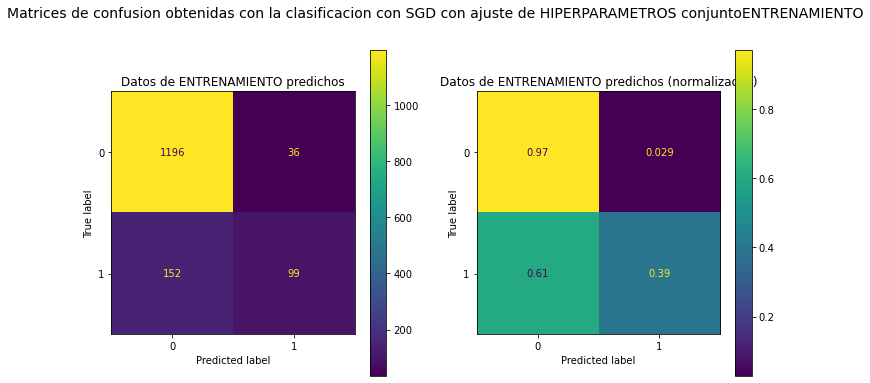

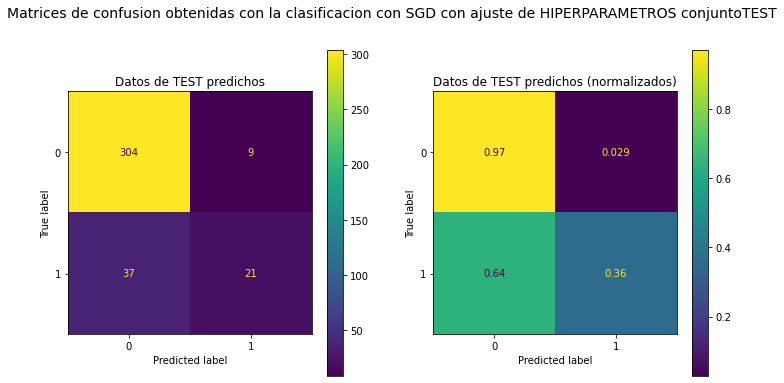

In [84]:
#scoring = {'accuracy': make_scorer(accuracy_score),
#           'prec': 'precision',
#           'avg_prec': 'average_precision'
#           }
# print(classification_report(y_train, y_train_predic_cv))

new_print('Evaluacion sobre el CdE y sobre el CdT (SGDClassifier+HIPERPARAMETROS)', True)
# train (entrenamiento)-.
report_sgd_class(y_train, y_train_predic_cv, 'ENTRENAMIENTO')
# testN (evaluacion)-.
report_sgd_class(y_test, y_test_predic_cv, 'EVALUACION')
new_print(None, False, True)


'''
Ejercicio 2.2.3_2: 
Para la mejor configuracion encontrada, evaluar sobre el conjunto de entrenamiento y 
sobre el conjunto de evaluacion, reportando:
* Matriz de confusion-.
'''
# ** matriz de confusion de los datos de ENTRENAMIENTO SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de ENTRENAMIENTO-.
cm, cm_n= get_cm(y_train, y_train_predic_cv, sgd_obj.classes_) # unpacking-.
# ** matriz de confusion de los datos de TEST SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de TEST-.
cm_test, cm_n_test= get_cm(y_test, y_test_predic_cv, sgd_obj.classes_) # unpacking-.

# imprimo las matrices de confusion SIN NORMALIZAR y NORMALIZADA (conj. de entrenamiento y test)-.
print(cm)
print(cm_test)
with np.printoptions(precision=2, suppress=True): # apply print options locally
    print(cm_n)
    print(cm_n_test)
    
    
if True:  # @ comentado 15062022 --FIG_9--
    nrows= 1; ncols= 2
    plot_cm(cm, cm_n, nrows, ncols, 'Matrices de confusion obtenidas con la '+
            'clasificacion con SGD con ajuste de HIPERPARAMETROS conjunto' +
            'ENTRENAMIENTO', 'ENTRENAMIENTO'
            )
if True:  # @ comentado 15062022 --FIG_10--
    nrows= 1; ncols= 2
    plot_cm(cm_test, cm_n_test, nrows, ncols, 'Matrices de confusion obtenidas con la '+
            'clasificacion con SGD con ajuste de HIPERPARAMETROS conjunto' +
            'TEST', 'TEST'
            )

Al seleccionar valores para los hiperparámetros loss, penalty y alpha y; setear valores de max_iter, power_t, learning_rate y n_jobs diferentes a los de default,  vemos que las métricas (en general) mejoraron respecto a la clasificación inicial obtenida con el mismo clasificador (SGDClassifier) con los valores de los hiperparámetros por defecto. En lineas generales puede decirse que los hiperparámetros correspondientes a
```
{'alpha': 0.001, 'learning_rate': 'optimal', 'loss': 'log', 'max_iter': 1000000.0, 'n_jobs': -1, 'penalty': 'l2', 'power_t': 0.5}
```
predicen y/o clasifican las dos etiquetas mejor que con los valores por defecto/default.

Al observar el reporte de clasificación obtenido para el conjunto de test y/o evaluación, los valores de las métricas precision, recall y f1-score mejoraron para ambas etiquetas, en tanto el accuracy del conjunto de datos test pasó de  0.87 a 0.88. Claramente, si bien las mejoras en el accuracy (medida y/o métrica macro) fueron prácticamente imperceptibles; las métricas correspondientes a precision, recall y f1-score para ambas etiquetas mejoró en mayor porcentaje que la mencionada métrica. Lo mencionado puede observarse al analizar y comparar las matrices de confusión para la clasificación con hiperparámetros por defecto y con ajuste de loss, penalty y alpha. No obstante lo mencionado, se concluye que debido al desablanceo en la variable target (las etiquetas 0 y 1), esta no es una buena métrica para indicar la bondad de ajuste del modelo (como se pone de manifiesto al analizar precision, recall y f1-score).

$\textbf{NOTA}$: se omite una descripción detallada de las implicancias fácticas de las métricas y de la matriz de confusión en general. Las mismas pueden encontrarse al final de la Sección 2.1.

## Ejercicio 3: Árboles de Decisión

En este ejercicio se entrenarán árboles de decisión para predecir la variable objetivo.

Para ello, deberán utilizar la clase DecisionTreeClassifier de scikit-learn.

Documentación:
- https://scikit-learn.org/stable/modules/tree.html
  - https://scikit-learn.org/stable/modules/tree.html#tips-on-practical-use
- https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html
- https://scikit-learn.org/stable/auto_examples/tree/plot_unveil_tree_structure.html

### Ejercicio 3.1: DecisionTreeClassifier con hiperparámetros por defecto

Entrenar y evaluar el clasificador DecisionTreeClassifier usando los valores por omisión de scikit-learn para todos los parámetros. Únicamente **fijar la semilla aleatoria** para hacer repetible el experimento.

Evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión

Instanciamos y entrenamos el model.

In [86]:
DecisionTreeClassifier(ccp_alpha= 0.0, class_weight= None, criterion= 'gini', max_depth= None,
                       max_features= None, max_leaf_nodes= None, min_impurity_decrease= 0.0,
                       min_samples_leaf= 1, min_samples_split= 2, min_weight_fraction_leaf= 0.0,
                       random_state= 0, splitter= 'best'
                       )

# instance the class (class Object)
tree_obj = DecisionTreeClassifier(random_state=0) # create an object of class DecisionTreeClassifier-.
# print(tree_obj.get_params()) # to show parameters used in decision tree algorithm-.

# train the ML model (training the model on entire training data)-.
tree_obj.fit(X_train_scaled, y_train) # training the AA model-.

# predict (using training and test DSs)-.
y_train_predic= tree_obj.predict(X_train_scaled)
y_test_predic= tree_obj.predict(X_test_scaled)

# check dataTypes of predicted values-.
# print('Data type of y_train_predic: {0}'.format(type(y_train_predic)))
# print('Data type of y_train_predic: {0}'.format(type(y_test_predic)))

# habiendo visto los TdD y teniendo en cuenta que se trata de un problema de
# clasificacion y que la
# variable OBJETIVO es de tipo categorica nominal binaria, i.e. solo toma dos valores
# posibles: 0 y 1; chequeo los valores (unicos) que tomaron las variables obtenidas
# a partir de, imprimo:
# print(np.unique(y_train_predic))
# print(np.unique(y_test_predic))

	
< ========//=========== > INI NUEVO PRINT< ==========//========== > 
	Deep tree obtained from training precess)

22
< ========//=========== > END NUEVO PRINT< ==========//========== > 


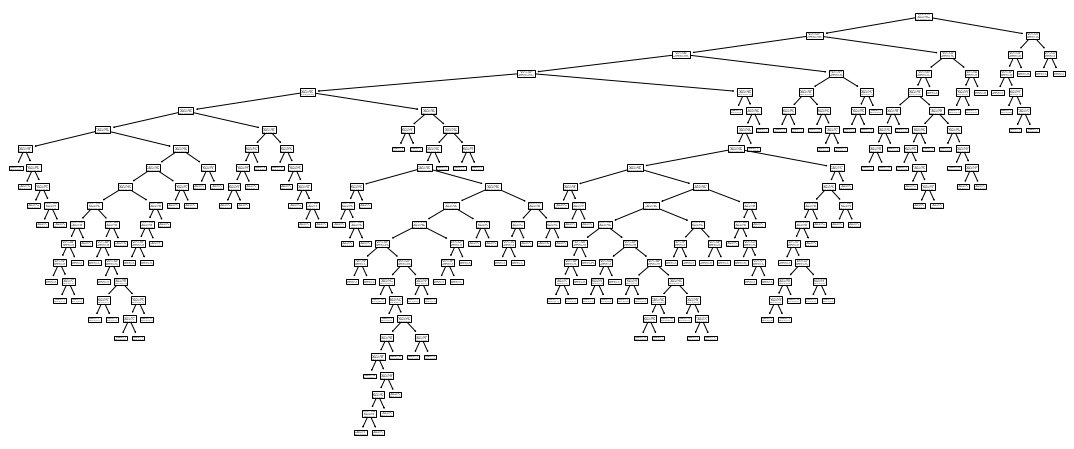

In [87]:
# print and draw deep tree-.
# las imprimo para chequear o en su defecto convertirlas-.
# print-.
new_print('Deep tree obtained from training precess)', True)
print(tree_obj.get_depth()) 
new_print(None, False, True)

# plot-.
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# see more advanced example:
# https://towardsdatascience.com/\
# how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
fig = plt.figure(figsize=(19,8))
tree.plot_tree(tree_obj)
plt.show()


	
< ========//=========== > INI NUEVO PRINT< ==========//========== > 
	Evaluacion sobre el CdE y sobre el CdT (DecisionTreeClassifier)

******************************************************************
SGD - Reporte de clasificacion del conjunto de ENTRENAMIENTO
******************************************************************
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1232
           1       1.00      1.00      1.00       251

    accuracy                           1.00      1483
   macro avg       1.00      1.00      1.00      1483
weighted avg       1.00      1.00      1.00      1483

******************************************************************
SGD - Reporte de clasificacion del conjunto de EVALUACION
******************************************************************
              precision    recall  f1-score   support

           0       0.93      0.93      0.93       313
           1       0.62      0.64      0

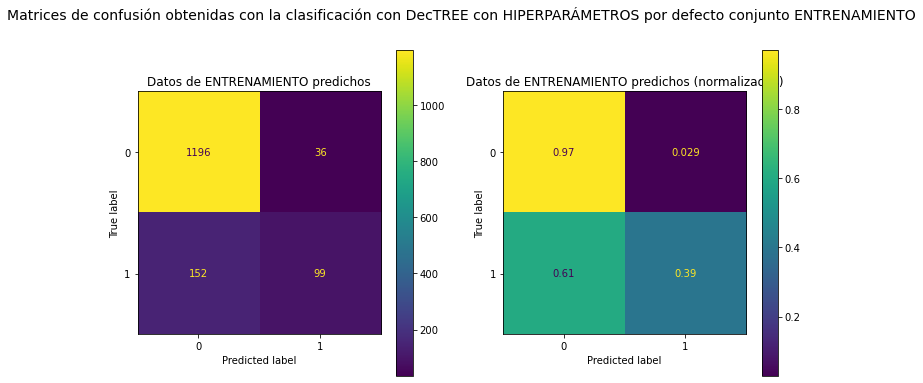

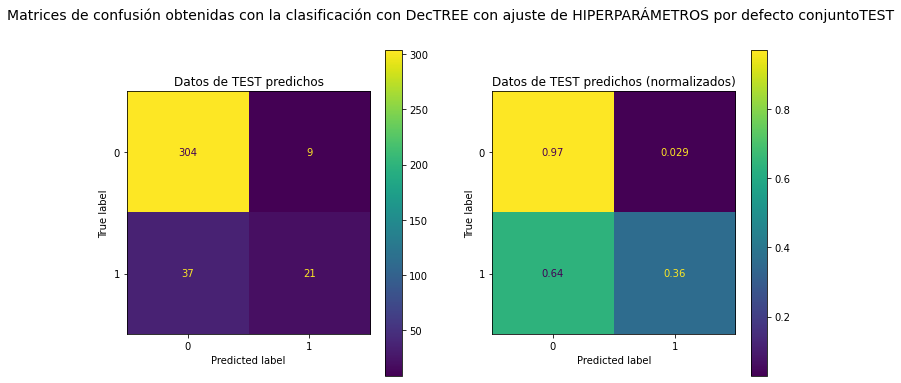

In [89]:
# print(classification_report(y_train, y_train_predic_cv))

new_print('Evaluacion sobre el CdE y sobre el CdT (DecisionTreeClassifier)', True)
# train (entrenamiento)-.
report_sgd_class(y_train, y_train_predic, 'ENTRENAMIENTO')
# test (evaluacion)-.
report_sgd_class(y_test, y_test_predic, 'EVALUACION')
new_print(None, False, True)

'''
Ejercicio 3.1.3:
Evaluar y reportar:
* Matriz de confusion
'''
# ** matriz de confusion de los datos de ENTRENAMIENTO SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de ENTRENAMIENTO-.
cm, cm_n= get_cm(y_train, y_train_predic_cv,
                 tree_obj.classes_) # unpacking-.
# ** matriz de confusion de los datos de TEST SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de TEST-.
cm_test, cm_n_test= get_cm(y_test, y_test_predic_cv,
                           tree_obj.classes_) # unpacking-.

# imprimo las matrices de confusion SIN NORMALIZAR y NORMALIZADA (conj. de entrenamiento y test)-.
print(cm)
print(cm_test)
with np.printoptions(precision=2, suppress=True): # apply print options locally
    print(cm_n)
    print(cm_n_test)
    
    
if True:  # @ comentado 15062022 --FIG_11--
    nrows= 1; ncols= 2
    plot_cm(cm, cm_n, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con DecTREE con HIPERPARÁMETROS por defecto conjunto ' +
            'ENTRENAMIENTO', 'ENTRENAMIENTO'
            )
if True:  # @ comentado 15062022 --FIG_12--
    nrows= 1; ncols= 2
    plot_cm(cm_test, cm_n_test, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con DecTREE con ajuste de HIPERPARÁMETROS por defecto conjunto' +
            'TEST', 'TEST'
            )

Al analizar los resultados obtenidos se observa que:
1. Precision, recall y f1-score
* precicion mejoró para ambas etiquetas (en mayor porcentaje para la etiqueta 0).
* recall disminuyó para la etiqueta 0 y aumentó considerablemente para la etiqueta 1.
* f1-score se mantuvo casi constante para la etiqueta 0 y mejoró considerablemente para la etiqueta 1.

2. Accuaracy (o métricas general del conjunto de datos de test/evaluación). Esta métrica mejoró levemente.

En este análisis se pone manifiesto la importancia del significado y las diferencias de las diferentes métricas en un problema de clasificación. Aún cuando las métricas accuracy y precision se mantienen casi constantes, la métrica recall y f1-score mejoran considerablemente para el caso de la etiqueta 1. Esto tiene una gran implicancia ya que la capacidad del modelo de predicir si un potencial cliente no es capaz de reembolsar un crédito mejoró considerablemente manteniéndose como un buen indicador para determinar si un potencial cliente es capaz de reembolsar un crédito para una accuracy casi constante respecto al clasificador basado en el método SGD.

$\textbf{NOTA RESPECTO AL CONJUNTO DE ENTRENAMIENTO}$

El modelo de clasificación basado en el algoritmos de Decision Tree con los parámetro usados en la clasificación (default values) sobreajusta la predicción del conjunto de entrenamiento (ver valores 1 en las métricas precision, recall, f1-score y en la métrica macro accuracy), por otro lado, esto se ve reflejado en la profundidad del árbol de decisión.

### Ejercicio 3.2: Ajuste de Hiperparámetros

Seleccionar valores para los hiperparámetros principales del DecisionTreeClassifier. Como mínimo, probar diferentes criterios de partición (criterion), profundidad máxima del árbol (max_depth), y cantidad mínima de samples por hoja (min_samples_leaf).

Para ello, usar grid-search y 5-fold cross-validation sobre el conjunto de entrenamiento para explorar muchas combinaciones posibles de valores.

Reportar accuracy promedio y varianza para todas las configuraciones.

Para la mejor configuración encontrada, evaluar sobre el conjunto de **entrenamiento** y sobre el conjunto de **evaluación**, reportando:
- Accuracy
- Precision
- Recall
- F1
- matriz de confusión


Documentación:
- https://scikit-learn.org/stable/modules/grid_search.html
- https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html

['mean_fit_time', 'mean_score_time', 'mean_test_score', 'param_criterion', 'param_max_depth', 'param_max_features', 'param_max_leaf_nodes', 'param_min_samples_leaf', 'params', 'rank_test_score', 'split0_test_score', 'split1_test_score', 'split2_test_score', 'split3_test_score', 'split4_test_score', 'std_fit_time', 'std_score_time', 'std_test_score']
   mean_fit_time  std_fit_time  mean_score_time  std_score_time  \
0       0.002155      0.000180         0.000522        0.000060   
1       0.001951      0.000117         0.000496        0.000095   
2       0.001932      0.000224         0.000473        0.000058   
3       0.002185      0.000171         0.000475        0.000057   
4       0.002339      0.000311         0.000520        0.000091   

  param_criterion param_max_depth param_max_features param_max_leaf_nodes  \
0            gini               8               auto                    6   
1            gini               8               auto                    6   
2            g

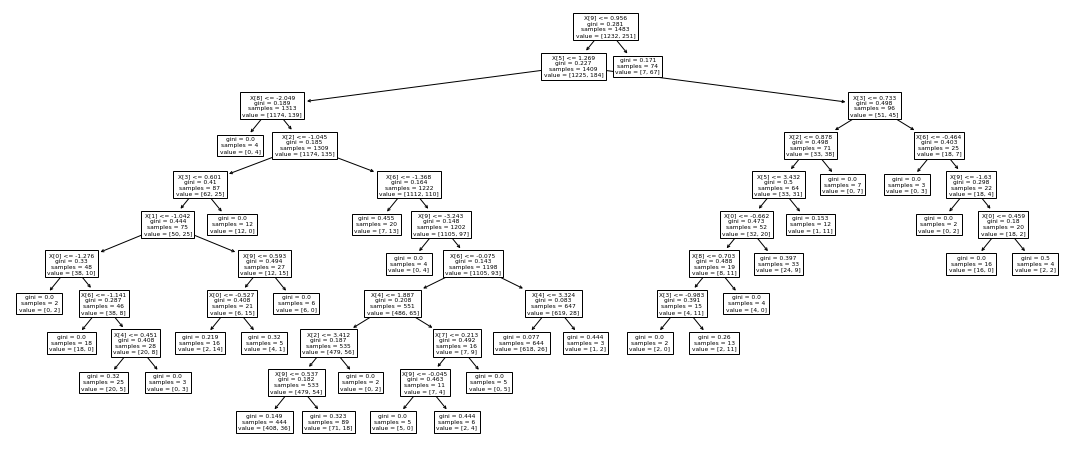

In [92]:
# 1- definimos los hiperparametros. Para esto declaramos e inicializamos un
# diccionario con los elegidos-.
grid = {'criterion': ['gini', 'entropy'], # Gini impurity, l.l. and ent.: Shannon information gain-. 
        'max_depth': [8,10,12,14,16],
        'min_samples_leaf' : [2,4,6],
        'max_leaf_nodes': [6,10,15,20,25,30],
        'max_features': ['auto', 'sqrt', 'log2']
        }

# see atributes of object-.
# print(sorted(tree_obj.get_params().keys()))
'''
paramGrid = ParameterGrid(grid)

# 1° manera: usando parfit.parfit (INTERESANTE, RETOMARLO)-.
bestModel, bestScore, allModels, allScores = pf.bestFit(DecisionTreeClassifier, paramGrid,
                                                        X_train, y_train, X_test, y_test,
                                                        metric = roc_auc_score,
                                                        scoreLabel = "AUC"
                                                        )

new_print('Mejor Modelo y mejor SCORE con DecisionTreeClassifier y Parfit', True)
print(bestModel, bestScore)
new_print(None, False, True)
# print(allModels, allScores)
'''

# 2° manera: usando GridSearchCV-.
# instance the class (class Object)-.
decTree_obj_cv= DecisionTreeClassifier(random_state=0) # idem previous case-.

# from https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
fold_decTree= None  # 5-fold cross-validation -- by Default it use 5-fold cross validation-.
# Exhaustive search over specified parameter values for an estimator.
decTree_cv= GridSearchCV(decTree_obj_cv, 
                         grid,
                         scoring='accuracy',
                         cv=fold_decTree,
                         # n_jobs=[-1] # it doesn't work, why? (all CPUs)-.
                         )
# training the model on entire training dataSet-.
decTree_cv.fit(X_train_scaled, y_train);

# see atributes of object-.
print(sorted(decTree_cv.cv_results_.keys()))
# see results-.
# print(decTree_obj_cv.cv_results_)

# as I saw it's complicated visualize results so I decide convert it to PDF (pandasDF)-.
# from https://stackoverflow.com/questions/58835592/result-of-gridsearchcv-as-table
df_results_decTree= pd.DataFrame(decTree_cv.cv_results_)
# print(pd.DataFrame({'param': decTree_cv.cv_results_["params"],
#                     'acc': decTree_cv.cv_results_["mean_test_score"]}
#                    )
#       )

print(df_results_decTree.head(5))

# using best model to predict (TRAINING and TEST DSs)-.
y_train_predic_cv= decTree_cv.best_estimator_.predict(X_train_scaled)
y_test_predic_cv= decTree_cv.best_estimator_.predict(X_test_scaled)

# check if predicted values are in 0 or 1-.
# print(np.unique(y_train_predic_cv))
# print(np.unique(y_test_predic_cv))

# print a precision measurement-.
print('Precision: {0}{1:.2f}{2}'.
      format(nl,accuracy_score(y_test, y_test_predic_cv), nl)
      )
print('Precision: {0}{1:.2f}{2}'.
      format(nl,accuracy_score(y_train, y_train_predic_cv), nl)
      )

# print and draw deep tree-.
# las imprimo para chequear o en su defecto convertirlas-.
# print-.
new_print('Deep tree obtained from training precess)', True)
print(decTree_cv.best_estimator_.get_depth())  # ACA
new_print(None, False, True)

# plot-.
# https://scikit-learn.org/stable/modules/generated/sklearn.tree.plot_tree.html
# see more advanced example:
# https://towardsdatascience.com/\
# how-to-visualize-a-decision-tree-from-a-random-forest-in-python-using-scikit-learn-38ad2d75f21c
fig = plt.figure(figsize=(19,8))
tree.plot_tree(decTree_cv.best_estimator_)
plt.show()

	
< ========//=========== > INI NUEVO PRINT< ==========//========== > 
	Evaluacion sobre el CdE y sobre el CdT (DecisionTreeClassifier+HIPERPARAMETROS)

******************************************************************
SGD - Reporte de clasificacion del conjunto de ENTRENAMIENTO
******************************************************************
              precision    recall  f1-score   support

           0       0.93      0.98      0.95      1232
           1       0.88      0.61      0.72       251

    accuracy                           0.92      1483
   macro avg       0.90      0.80      0.84      1483
weighted avg       0.92      0.92      0.91      1483

******************************************************************
SGD - Reporte de clasificacion del conjunto de EVALUACION
******************************************************************
              precision    recall  f1-score   support

           0       0.92      0.96      0.94       313
           1       0.71 

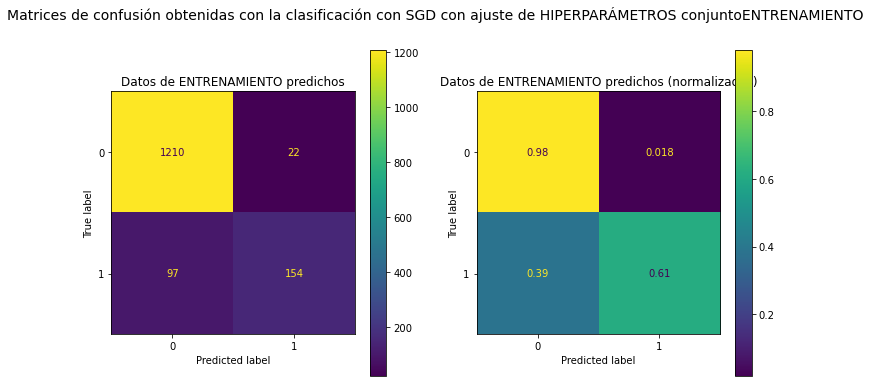

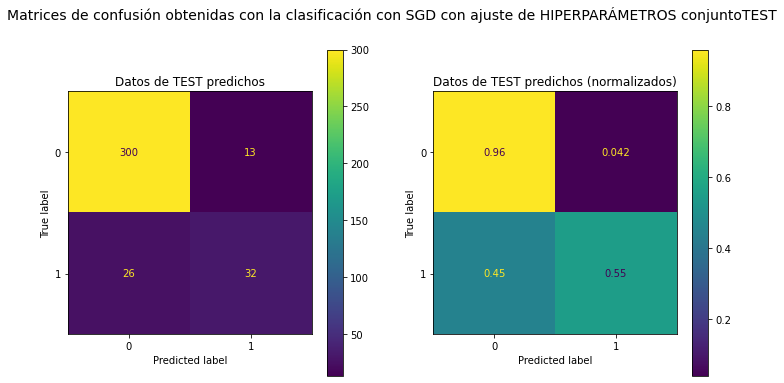

In [94]:
# print(classification_report(y_train, y_train_predic_cv))

new_print('Evaluacion sobre el CdE y sobre el CdT (DecisionTreeClassifier+HIPERPARAMETROS)', True)
# train (entrenamiento)-.
report_sgd_class(y_train, y_train_predic_cv, 'ENTRENAMIENTO')
# test (evaluacion)-.
report_sgd_class(y_test, y_test_predic_cv, 'EVALUACION')
new_print(None, False, True)

'''
Ejercicio 3.2.3:
Evaluar y reportar:
* Matriz de confusion
'''
# ** matriz de confusion de los datos de ENTRENAMIENTO SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de ENTRENAMIENTO-.
cm, cm_n= get_cm(y_train, y_train_predic_cv,
                 decTree_cv.best_estimator_.classes_) # unpacking-.
# ** matriz de confusion de los datos de TEST SIN NORMALIZAR-.
# ** matriz de confusion NORMALIZADA de los datos de TEST-.
cm_test, cm_n_test= get_cm(y_test, y_test_predic_cv,
                           decTree_cv.best_estimator_.classes_) # unpacking-.


# imprimo las matrices de confusion SIN NORMALIZAR y NORMALIZADA (conj. de entrenamiento y test)-.
print(cm)
print(cm_test)
with np.printoptions(precision=2, suppress=True): # apply print options locally
    print(cm_n)
    print(cm_n_test)
    
    
if True:  # @ comentado 15062022 --FIG_13--
    nrows= 1; ncols= 2
    plot_cm(cm, cm_n, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con SGD con ajuste de HIPERPARÁMETROS conjunto' +
            'ENTRENAMIENTO', 'ENTRENAMIENTO'
            )
if True:  # @ comentado 15062022 --FIG_14--
    nrows= 1; ncols= 2
    plot_cm(cm_test, cm_n_test, nrows, ncols, 'Matrices de confusión obtenidas con la '+
            'clasificación con SGD con ajuste de HIPERPARÁMETROS conjunto' +
            'TEST', 'TEST'
            )

Al analizar los resultados obtenidos con el modelo DecisionTreeClassifier con selección de HIPERPARÁMETROS y comparar con los valores de las variables correspondientes obtenidos con el modelo de clasificación DecisionTreeClassifier con los parámetros por default:
1. Precision, recall y f1-score
* precicion presenta prácticamente el mismo valor para el clasificador 0 y aumenta considerablemente para el clasificador 1.
* recall aumentó para la etiqueta 0 y disminuyó para la etiqueta 1.
* f1-score se mantuvo prácticamente constante para ambas etiquetas.

2. Accuracy (o métricas general del conjunto de datos de test/evaluación)
Esta métrica mejoró levemente.

Al igual que para el caso precedente (clasificación basado en DecisionTreeClassifier e hiperparámetros por defecto y SGD en con o sin selección de hiperparámetros), en este caso se pone manifiesto la importancia del significado y las diferencias de las diferentes métricas en un problema de clasificación. Aún cuando la métrica accuracy y precision se mantienen casi constantes, la métrica recall y f1-score mejoran considerablemente para el caso de la etiqueta 1 (respacto a los resultados obtenidos con el clasificador SGD con o sin selección de hiperparámetros). Esto tiene una gran implicancia ya que la capacidad del modelo de predicir si un potencial cliente no es capaz de reembolsar un crédito mejoró considerablemente manteniéndose un buen indicador para determinar si un potencial cliente es capaz de reembolsar un crédito para una accuracy casi constante entre los diferentes casos.

$\textbf{NOTA RESPECTO AL CONJUNTO DE ENTRENAMIENTO}$


El modelo de clasificación basado en el algoritmos de Decision Tree con HIPERPARÁMETROS, a difrencia del mismo modelo de clasificación con hiperparámetros por defecto, NO sobreajusta la predicción del conjunto de entrenamiento obteniéndose un muy buen ajuste para ambos clasificadores. Por otro lado, la profundidad del árbol de decisión disminuye considerablemente.

$\textbf{NOTA RESPECTO A LA MATRIZ DE CONFUSIÓN}$


Al analizar los valores de las componentes de la/s matriz/ces de confusión -entrenamiento y test/validación- (TP, FP, TN y FN), se observa que a diferencia de los tres casos analizados, los mayores valores se encuentran en la diagonal de la matriz tanto para la clasificación como para entrenamiento.


Claramente y a partir del análisis realizado y teniendo en cuenta que el modelo de clasificación basado en DecisionTreeClassifier y selección de HIPERPARÁMETROS presenta un comportamiento semejante al mismo modelo con hiperparámetros por defecto pero con una profundidad considerablemente menor (10 y 22 respectivamente), este último modelo es el mejor de los cuatro analizados en este práctico.